In [1]:
import tensorflow as tf
import keras
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

D:\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ana\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future 

In [2]:
choosen_index = [i+1 for i in range(20)]
print("Choosen index is:", choosen_index)

Choosen index is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [3]:
X_train = []
X_test = []
y_train = []
y_test = []

for i in choosen_index:
    dir = os.listdir('PIE'+'/'+ str(i))
    Xi = []
    yi = []
    for idx in dir:
        img = np.array(Image.open('PIE'+'/'+ str(i) +'/'+ idx)) / 256
        Xi.extend(img.reshape(-1, 32, 32))
        yi.append(i)
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3 )
    X_train.extend(Xi_train)
    X_test.extend(Xi_test)
    y_train.extend(yi_train)
    y_test.extend(yi_test)
X_train = np.array(X_train)[:,np.newaxis]
X_test = np.array(X_test)[:,np.newaxis]
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)

(2380, 1, 32, 32)


In [4]:
Xm_train = []
Xm_test = []
ym_train = []
ym_test = []

# Set my photo label=0
dir = os.listdir('MYSELF')
Xi = []
yi = []
for idx in dir:
    img = np.array(Image.open('MYSELF'+'/'+ idx)) / 256
    Xi.extend(img.reshape(-1, 32, 32))
    yi.append(0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xi, yi, test_size=0.3, shuffle=False)
Xm_train = np.array(Xm_train)[:,np.newaxis]
Xm_test = np.array(Xm_test)[:,np.newaxis]
ym_train = np.array(ym_train)
ym_test = np.array(ym_test)
print(Xm_train.shape)

(7, 1, 32, 32)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import plot_model

In [6]:
input_shape = (1, 32, 32)
num_classes = 21
def create_CNN(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(20, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu', data_format="channels_first",
                 input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))
    model.add(Conv2D(50, (5, 5), activation='relu', data_format="channels_first"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01),metrics=['accuracy'])
    return model

In [7]:
model = create_CNN(input_shape, num_classes)
sgd = SGD(lr=0.006, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 8  # batch for one time
epochs = 10  # epoch size
one_hot_labels_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
one_hot_labels_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
hist = model.fit(X_train, one_hot_labels_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, one_hot_labels_test)
         )
plot_model(model, show_shapes=True, to_file='model.png')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2380 samples, validate on 1020 samples
Epoch 1/10
2380/2380 [==============================] - 6s 3ms/step - loss: 2.9420 - acc: 0.0870 - val_loss: 2.7092 - val_acc: 0.1529
Epoch 2/10
2380/2380 [==============================] - 6s 2ms/step - loss: 1.4193 - acc: 0.5618 - val_loss: 0.7896 - val_acc: 0.7353
Epoch 3/10
2380/2380 [==============================] - 6s 2ms/step - loss: 0.4420 - acc: 0.8639 - val_loss: 0.2914 - val_acc: 0.9127
Epoch 4/10
2380/2380 [==============================] - 6s 2ms/step - loss: 0.2468 - acc: 0.9294 - val_loss: 0.2753 - val_acc: 0.9284
Epoch 5/10
2380/2380 [==============================] - 6s 2ms/step - loss: 0.1685 - acc: 0.9529 - val_loss: 0.1601 - val_acc: 0.9539
Epoch 6/10
2380/2380 [==============================] - 6s 2ms/step - loss: 0.0700 - acc: 0.9786 - val_loss: 0.1295 - val_acc: 0.9637
Epoch 7/10
2380/2380 [======

Test loss: 0.07780753884272759
Test accuracy: 0.9774509803921568


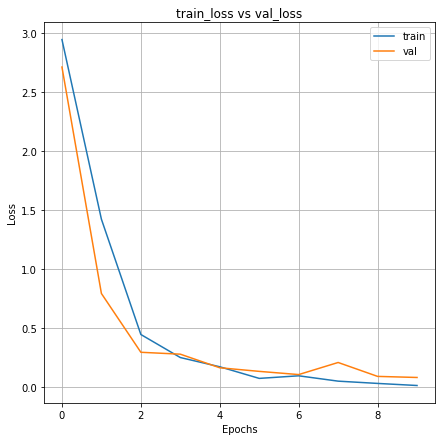

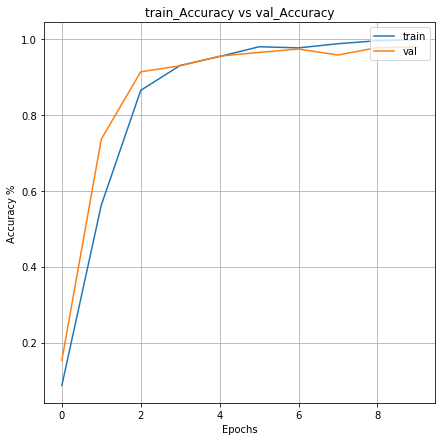

In [8]:
score = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the results
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.figure(figsize=(7, 7))
plt.grid()
plt.plot(train_loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.title('train_loss vs val_loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.figure(figsize=(7, 7))
plt.grid()
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylabel('Accuracy %')
plt.title('train_Accuracy vs val_Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()